In [52]:
import numpy as np
import statsmodels.api as sm
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
plt.rc("text", usetex=True)
plt.rc('text.latex', preamble=r"\usepackage{amsmath, physics}")
plt.rc("font", family="serif", serif=["Computer Modern"])
plt.rc("axes", titlesize=20, labelsize=18)
plt.rc("xtick", labelsize=12)
plt.rc("ytick", labelsize=12)
plt.rc("legend", fontsize=12)

# 8.4.4

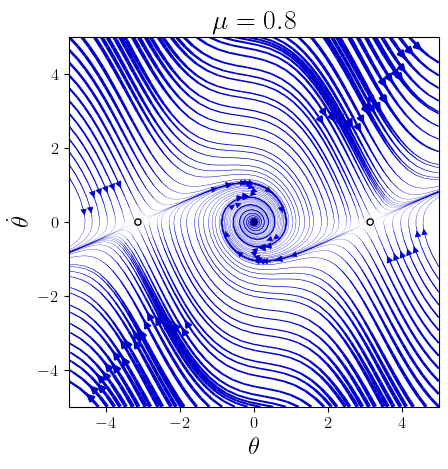

In [7]:
y, theta = np.mgrid[-5:5:1000j, -5:5:1000j]
mu = 0.8
theta_dot = y
ydot = (mu * np.cos(theta) - 1) * y - np.sin(theta)

speed = np.sqrt(theta_dot**2 + ydot**2)
lw = 3 * speed / speed.max()

fig, ax = plt.subplots()
ax.set_title(fr"$\mu={mu}$")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$\dot{\theta}$")

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect("equal")

ax.streamplot(theta, y, theta_dot, ydot, color="mediumblue", linewidth=lw,
              broken_streamlines=False)
ax.scatter([-np.pi, 0.0, np.pi], [0.0, 0.0, 0.0], 20, linewidths=1,
           c=["white", "black", "white"], edgecolors="black")

plt.savefig("8.4.4.mu0.8.pdf", bbox_inches="tight")
plt.show()

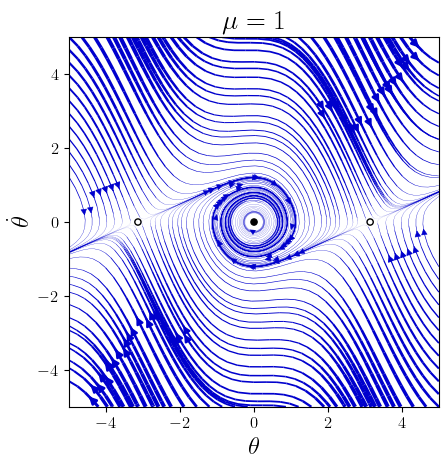

In [10]:
y, theta = np.mgrid[-5:5:1000j, -5:5:1000j]
mu = 1
theta_dot = y
ydot = (mu * np.cos(theta) - 1) * y - np.sin(theta)

speed = np.sqrt(theta_dot**2 + ydot**2)
lw = 3 * speed / speed.max()

fig, ax = plt.subplots()
ax.set_title(fr"$\mu={mu}$")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$\dot{\theta}$")

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect("equal")

ax.streamplot(theta, y, theta_dot, ydot, color="mediumblue", linewidth=lw,
              broken_streamlines=False)
ax.scatter([-np.pi, 0.0, np.pi], [0.0, 0.0, 0.0], 20, linewidths=1,
           c=["white", "black", "white"], edgecolors="black")

plt.savefig("8.4.4.mu1.pdf", bbox_inches="tight")
plt.show()

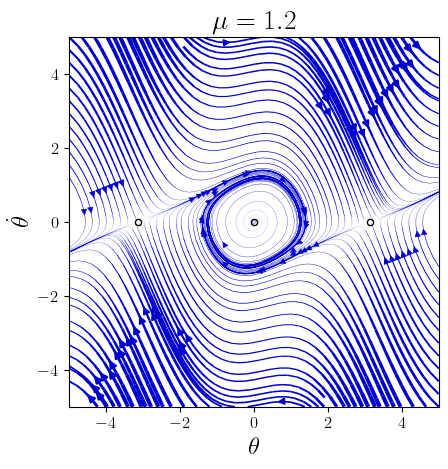

In [9]:
y, theta = np.mgrid[-5:5:1000j, -5:5:1000j]
mu = 1.2
theta_dot = y
ydot = (mu * np.cos(theta) - 1) * y - np.sin(theta)

speed = np.sqrt(theta_dot**2 + ydot**2)
lw = 3 * speed / speed.max()

fig, ax = plt.subplots()
ax.set_title(fr"$\mu={mu}$")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$\dot{\theta}$")

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect("equal")

ax.streamplot(theta, y, theta_dot, ydot, color="mediumblue", linewidth=lw,
              broken_streamlines=False)
ax.scatter([-np.pi, 0.0, np.pi], [0.0, 0.0, 0.0], 20, linewidths=1,
           c="white", edgecolors="black")

plt.savefig("8.4.4.mu1.2.pdf", bbox_inches="tight")
plt.show()

In [26]:
def diff(t, x, mu):
    return (x[1], (mu * np.cos(x[0]) - 1) * x[1] - np.sin(x[0]))

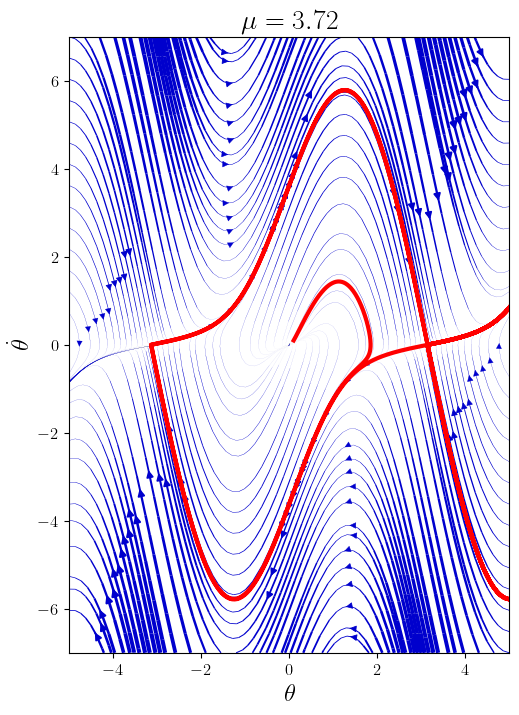

In [51]:
y, theta = np.mgrid[-7:7:1000j, -5:5:1000j]
mu = 3.72
theta_dot = y
ydot = (mu * np.cos(theta) - 1) * y - np.sin(theta)

speed = np.sqrt(theta_dot**2 + ydot**2)
lw = 3 * speed / speed.max()

sol = solve_ivp(diff, (0, 1000), (0.1, 0.1), args=(mu,),
                method="BDF", dense_output=True)
t = np.linspace(0, 1000, 100000)
theta_cycle, y_cycle = sol.sol(t)

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_title(fr"$\mu={mu}$")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$\dot{\theta}$")

ax.set_xlim(-5, 5)
ax.set_ylim(-7, 7)
ax.set_aspect("equal")

ax.streamplot(theta, y, theta_dot, ydot, color="mediumblue", linewidth=lw,
              broken_streamlines=False)
ax.plot(theta_cycle, y_cycle, lw=3, color="red")

plt.savefig("8.4.4.mu3.72.pdf", bbox_inches="tight")
plt.show()

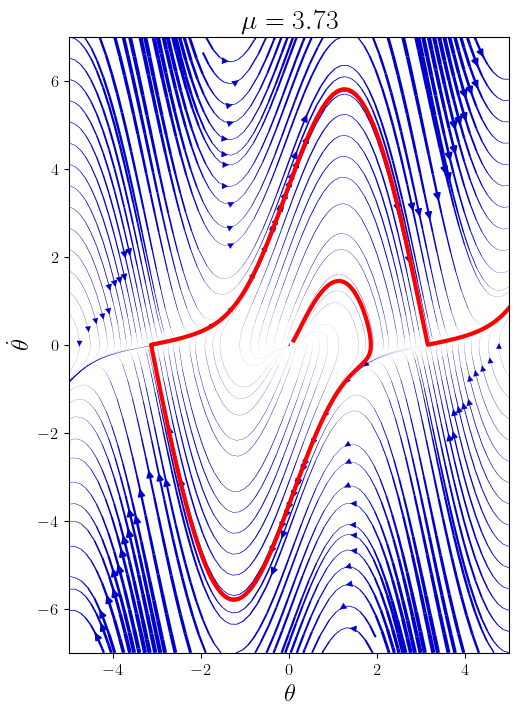

In [52]:
y, theta = np.mgrid[-7:7:1000j, -5:5:1000j]
mu = 3.73
theta_dot = y
ydot = (mu * np.cos(theta) - 1) * y - np.sin(theta)

speed = np.sqrt(theta_dot**2 + ydot**2)
lw = 3 * speed / speed.max()

sol = solve_ivp(diff, (0, 1000), (0.1, 0.1), args=(mu,),
                method="BDF", dense_output=True)
t = np.linspace(0, 1000, 100000)
theta_cycle, y_cycle = sol.sol(t)

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_title(fr"$\mu={mu}$")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$\dot{\theta}$")

ax.set_xlim(-5, 5)
ax.set_ylim(-7, 7)
ax.set_aspect("equal")

ax.streamplot(theta, y, theta_dot, ydot, color="mediumblue", linewidth=lw,
              broken_streamlines=False)
ax.plot(theta_cycle, y_cycle, lw=3, color="red")

plt.savefig("8.4.4.mu3.73.pdf", bbox_inches="tight")
plt.show()

# 8.7.3

In [17]:
def cobweb_plot(ax, poincare_map, x0, *args, iter=5, **kwargs):
    x = x0
    for i in range(1, iter + 1):
        px = poincare_map(x, *args)
        ax.plot([x, x, px], [x, px, px], alpha = i / iter, **kwargs)
        x = px

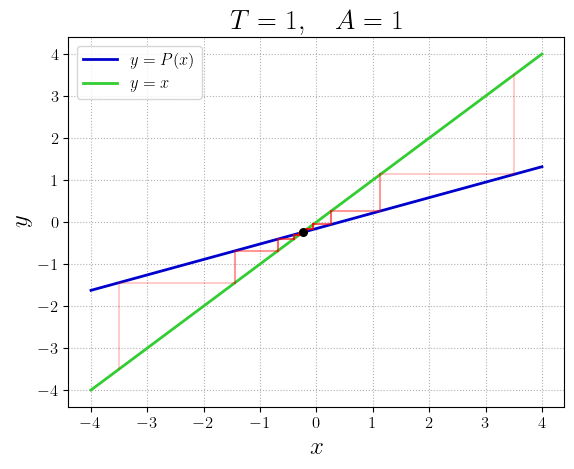

In [37]:
def square_wave_poincare_map(x, T, A):
    return np.exp(-T) * x - A * (1 - np.exp(-T/2)) ** 2
x = np.linspace(-4, 4, 1000)
T, A = 1, 1

fig, ax = plt.subplots()
ax.plot(x, square_wave_poincare_map(x, T, A), lw=2,
        color="mediumblue", label="$y = P(x)$")
ax.plot(x, x, lw=2, color="limegreen", label="$y = x$")
ax.scatter([- A * np.tanh(T/4)], [- A * np.tanh(T/4)], 30,
           c="black", zorder=3)
cobweb_plot(ax, square_wave_poincare_map, 3.5, T, A, iter=5, color="red", lw=1.5)
cobweb_plot(ax, square_wave_poincare_map, -3.5, T, A, iter=5, color="red", lw=1.5)

ax.set_title(f"$T={T},\quad A={A}$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

ax.grid(ls="dotted")
ax.legend()

plt.savefig("8.7.3.pdf", bbox_inches="tight")
plt.show()

# 9.3.9

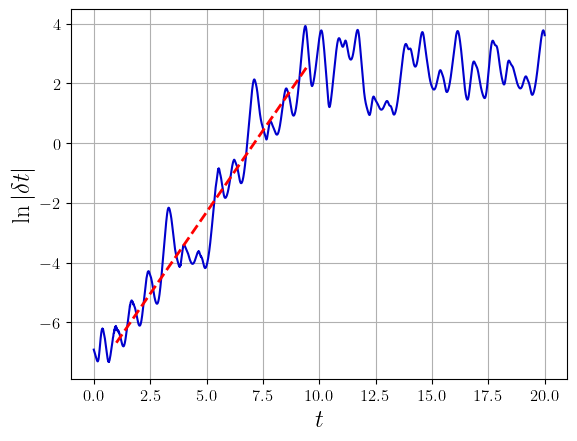

In [67]:
def lorenz(t, x, sigma, r, b):
    return (sigma * (x[1] - x[0]),
            r * x[0] - x[1] - x[0] * x[2],
            x[0] * x[1] - b * x[2])

sol = solve_ivp(lorenz, (0, 20), (0.896, 1.561, 11.246),
                args=(10.0, 28.0, 8/3), method="BDF", dense_output=True)
t = np.linspace(0, 20, 10000)
x, y, z = sol.sol(t)

sol = solve_ivp(lorenz, (0, 20), (0.896, 1.561, 11.246 + 0.001),
                args=(10.0, 28.0, 8/3), method="BDF", dense_output=True)
t = np.linspace(0, 20, 10000)
xnew, ynew, znew = sol.sol(t)

delta = ((xnew - x)**2 + (ynew - y)**2 + (znew - z)**2)**0.5
tfit, deltafit = t[500:4751], delta[500:4751]
fit = sm.OLS(np.log(deltafit), sm.add_constant(tfit)).fit()

fig, ax = plt.subplots()
ax.plot(t, np.log(delta), color="mediumblue")
ax.plot(tfit, fit.fittedvalues, color="red",
        lw=2, ls="dashed")
ax.set_xlabel("$t$")
ax.set_ylabel(r"$\ln\abs{\delta t}$")
ax.grid()

plt.savefig("9.3.9.pdf", bbox_inches="tight")
plt.show()

In [69]:
count = 1000
lambda_avg = 0.0
for _ in range(count):
    sol = solve_ivp(lorenz, (0, 20), (0.896, 1.561, 11.246),
                    args=(10.0, 28.0, 8/3), method="BDF", dense_output=True)
    t = np.linspace(0, 20, 10000)
    x, y, z = sol.sol(t)

    randnums = 0.001 * np.random.rand(3)
    sol = solve_ivp(lorenz, (0, 20),
        (0.896 + randnums[0], 1.561 + randnums[1], 11.246 + randnums[2]),
        args=(10.0, 28.0, 8/3), method="BDF", dense_output=True)
    t = np.linspace(0, 20, 10000)
    xnew, ynew, znew = sol.sol(t)

    delta = ((xnew - x)**2 + (ynew - y)**2 + (znew - z)**2)**0.5
    tfit, deltafit = t[500:4751], delta[500:4751]
    fit = sm.OLS(np.log(deltafit), sm.add_constant(tfit)).fit()
    lambda_avg += fit.params[1] / count
print(lambda_avg)

0.9557124702346175
